Binomial & Trinomial Models

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
from datetime import date


Problem 1

a.

In [4]:
# (a)
def BinomCallA(r, sigma, s0, K, T, n = 200):
    delta = T/n
    disc = math.exp(- r * delta)
    
    c = 1/2. * (math.exp(-r * delta) + math.exp((r + sigma**2) *delta))
    d = c - math.sqrt(c**2 -1)
    u = 1/float(d)
    p = (math.exp(r * delta) - d)/(u-d)
    
    # create matrix to store stock prices ans option prices at all nodes
    stockprice = np.zeros((n+1, n+1))
    optprice = np.zeros((n+1, n+1))
    stockprice[0,0] = s0 # initialize stock price
    
    for i in range(1, n+1):
        stockprice[i, 0] = stockprice[i-1, 0] * u
        for j in range(1, i+1):
            stockprice[i, j] = stockprice[i-1, j-1] * d
    
    # compute the call payoffs from the ending node
    for w in range(n+1):
        optprice[n, w] = max(stockprice[n, w] - K,0)
     
    # backward
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            optprice[i, j] = disc * (p * optprice[i+1, j] + (1-p) * optprice[i+1, j+1])
            
    return optprice[0,0]

call_a = [BinomCallA(r = 0.05, sigma = 0.24, s0 = 32, K =30, T =0.5, n = x) for x in [10,20,40,80,100,200,500]]

b.

In [5]:
# (b)
def BinomCallB(r, sigma, s0, K, T, n = 200):
    delta = T/n
    disc = math.exp(- r * delta)
    
    u = math.exp(r * delta) * (1 + math.sqrt(math.exp(delta * sigma**2) -1))
    d = math.exp(r * delta) * (1 - math.sqrt(math.exp(delta * sigma**2) -1))
    p = 1/2.
     
    # create matrix to store stock prices ans option prices at all nodes
    stockprice = np.zeros((n+1, n+1))
    optprice = np.zeros((n+1, n+1))
    stockprice[0,0] = s0 # initialize stock price
    
    for i in range(1, n+1):
        stockprice[i, 0] = stockprice[i-1, 0] * u
        for j in range(1, i+1):
            stockprice[i, j] = stockprice[i-1, j-1] * d
    
    # compute the call payoffs from the ending node
    for w in range(n+1):
        optprice[n, w] = max(stockprice[n, w] - K,0)
     
    # backward
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            optprice[i, j] = disc * (p * optprice[i+1, j] + (1-p) * optprice[i+1, j+1])
            
    return optprice[0,0]
    
call_b = [BinomCallB(r = 0.05, sigma = 0.24, s0 = 32, K =30, T =0.5, n = x) for x in [10,20,40,80,100,200,500]]

c.

In [6]:
def BinomCallJR(r, sigma, s0, K, T, n = 200):
    delta = T/n
    disc = math.exp(- r * delta)
    
    u = math.exp((r - 0.5 * sigma**2)*delta + sigma * math.sqrt(delta))
    d = math.exp((r - 0.5 * sigma**2)*delta - sigma * math.sqrt(delta))
    p = 1/2.
    
    # create matrix to store stock prices ans option prices at all nodes
    stockprice = np.zeros((n+1, n+1))
    optprice = np.zeros((n+1, n+1))
    stockprice[0,0] = s0 # initialize stock price
    
    for i in range(1, n+1):
        stockprice[i, 0] = stockprice[i-1, 0] * u
        for j in range(1, i+1):
            stockprice[i, j] = stockprice[i-1, j-1] * d
    
    # compute the call payoffs from the ending node
    for w in range(n+1):
        optprice[n, w] = max(stockprice[n, w] - K,0)
     
    # backward
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            optprice[i, j] = disc * (p * optprice[i+1, j] + (1-p) * optprice[i+1, j+1])
            
    return optprice[0,0]
    
call_c = [BinomCallJR(r = 0.05, sigma = 0.24, s0 = 32, K =30, T =0.5, n = x) for x in [10,20,40,80,100,200,500]]


d.

In [22]:
def BinomCallCRR(r, sigma, s0, K, T, n = 200):
    delta = T/n
    disc = math.exp(- r * delta)
    
    u = math.exp(sigma * math.sqrt(delta))
    d = math.exp(-sigma * math.sqrt(delta))
    p = 1/2. + 1/2. * (r - 0.5 * sigma**2) * math.sqrt(delta)/sigma
    
    
    # create matrix to store stock prices ans option prices at all nodes
    stockprice = np.zeros((n+1, n+1))
    optprice = np.zeros((n+1, n+1))
    stockprice[0,0] = s0 # initialize stock price
    
    for i in range(1, n+1):
        stockprice[i, 0] = stockprice[i-1, 0] * u
        for j in range(1, i+1):
            stockprice[i, j] = stockprice[i-1, j-1] * d
    
    # compute the call payoffs from the ending node
    for w in range(n+1):
        optprice[n, w] = max(stockprice[n, w] - K,0)
     
    # backward
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            optprice[i, j] = disc * (p * optprice[i+1, j] + (1-p) * optprice[i+1, j+1])
            
    return optprice[0,0]
    
call_d = [BinomCallCRR(r = 0.05, sigma = 0.24, s0 = 32, K =30, T =0.5, n = x) for x in [10,20,40,80,100,200,500]]

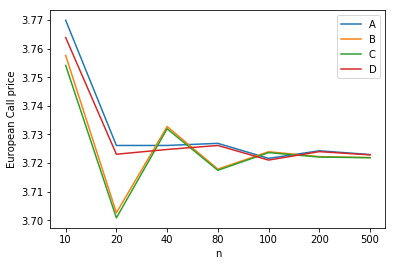

In [23]:
plt.plot(call_a, label = 'A')
plt.plot(call_b, label = 'B')
plt.plot(call_c, label = 'C')
plt.plot(call_d, label = 'D')
plt.xlabel('n')
plt.ylabel('European Call price')
plt.legend()
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['10', '20', '40', '80', '100', '200','500'], rotation = 0)  
plt.show()
plt.clf()

Problem 2

In [9]:
# download daily prices for the past 60 months from 2013/02/07 until 2018/02/07
start_date = '2013-02-07'
end_date = '2018-02-07'
panel_data = pdr.data.DataReader('GOOG', 'yahoo', start_date, end_date)
GOOG = panel_data['Adj Close']

current = GOOG[-1] # current price of GOOG
GOOG_K = current * 1.1 - (current*1.1)%10
GOOG_ret = GOOG/GOOG.shift(1) -1 # compute the daily return for GOOG
GOOG_vol = np.std(GOOG_ret[1:]) * math.sqrt(252) # annualized historical volatility
tao = date(2019, 1, 18) - date(2018, 2, 7)
GOOG_T = tao.days/365

# compute the call price using CRR binomial tree
call_GOOG = BinomCallCRR(r = 0.02, sigma = GOOG_vol, s0 = current, K = GOOG_K, T = GOOG_T)
realprice = 70
print("Estimated price: " + str(call_GOOG))
print("Market price: " + str(realprice))

Estimated price: 58.6950226057
Market price: 70


From Yahoo Finance, we searched for call written on GOOG that expires on January 18, 2019 with strike price of 1150. The last traded price on Feb, 07 is $70, with implied volatility of 1.56% (daily) as quoted on Yahoo Finance. The estimated price computed using CRR binomial method is lower than the real price. The use of histricol volatility is biased based on assumption that the past and the present have the same pattern. A bias in volatility creates the discrepancy between estimated price and real market price.

In [10]:
def n(x):
    pdf = 1/math.sqrt(2 * np.pi) * math.exp(- x**2/2)
    return pdf

def V(r, sigma, s0, K, T):
    d1 = 1/(sigma * math.sqrt(T)) * (np.log(s0/K) + (r + sigma**2/2) * T)
    return s0 * math.sqrt(T) * n(d1)


def ImpliedVol(target, r, s0, K, T):
    max_iter = 100
    precision = 0.000001

    sigma = 0.2
    for i in range(0, max_iter):
        price = BinomCallCRR(r, sigma, s0, K, T)
        vega = V(r, sigma, s0, K, T)

        diff = target - price 

        if (abs(diff) < precision):
            return sigma
        sigma = sigma + diff/vega 

    return sigma

vol = ImpliedVol(target = realprice, r = 0.02, s0 = current, K = GOOG_K, T = GOOG_T)
print("Implied volatility: " + str(vol))

Implied volatility: 0.249580625554


The implied volatility is 0.249580625554 while the historical volatility is 0.221622516. An underestimation of volatility results in the underpricing of call option, since Vega of options are always positive. 

Problem 3

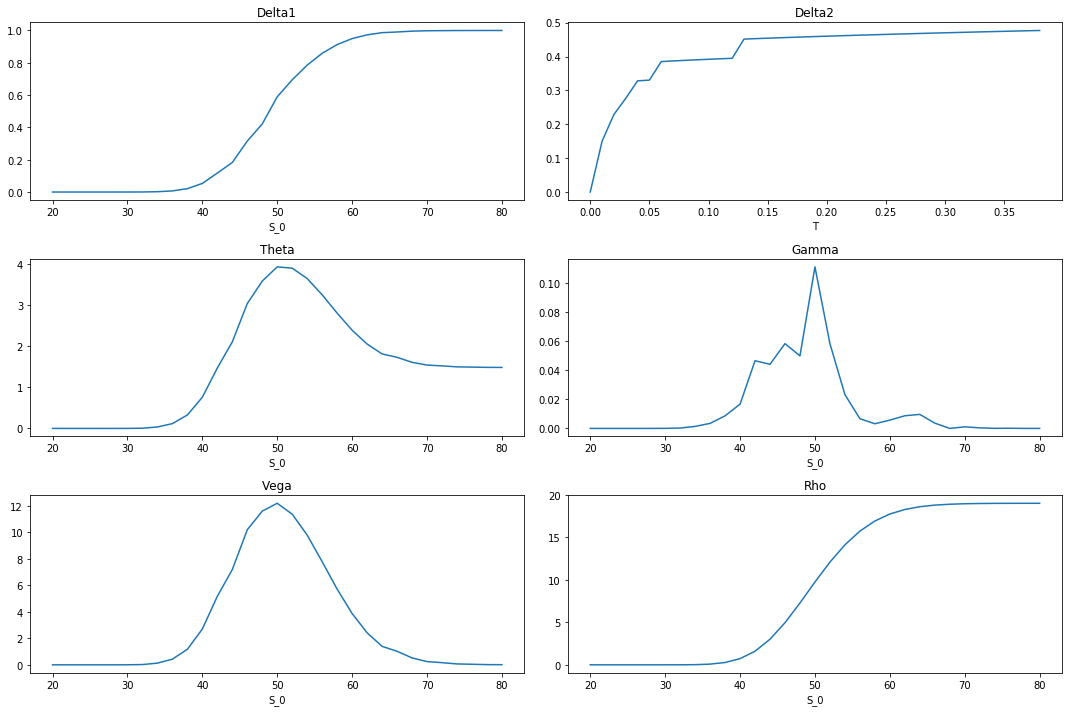

In [28]:
def delta1(S0):
    return (BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0+0.0001, K =50, T = 0.3846) - 
            BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0, K = 50, T = 0.3846))/0.0001
            
def delta2(tao):
    return (BinomCallCRR(r = 0.03, sigma = 0.2, s0 = 49+0.0001, K =50, T = tao) - 
            BinomCallCRR(r = 0.03, sigma = 0.2, s0 = 49, K = 50, T = tao))/0.0001
            
def theta(S0):
    return (BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0, K =50, T = 0.3846 + 0.0001) - 
            BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0, K = 50, T = 0.3846))/0.0001


def gamma(S0):
    g = (BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0 + 0.5, K =50, T = 0.3846) - 
         2 * BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0, K =50, T = 0.3846) + 
         BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0 - 0.5, K = 50, T = 0.3846))/(0.5**2)
    return g

def vega(S0):
    return (BinomCallCRR(r = 0.03, sigma = 0.2+0.0001, s0 = S0, K =50, T = 0.3846) - 
            BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0, K = 50, T = 0.3846))/0.0001
    
def rho(S0):
    return (BinomCallCRR(r = 0.03+0.0001, sigma = 0.2, s0 = S0, K =50, T = 0.3846) - 
            BinomCallCRR(r = 0.03, sigma = 0.2, s0 = S0, K = 50, T = 0.3846))/0.0001


Delta1 = [delta1(S0) for S0 in range(20, 82, 2)]
Delta2 = [delta2(tao) for tao in np.arange(0, 0.3846, 0.01)]
Theta = [theta(S0) for S0 in range(20, 82, 2)]
Gamma = [gamma(S0) for S0 in range(20, 82, 2)]
Vega = [vega(S0) for S0 in range(20, 82, 2)]
Rho = [rho(S0) for S0 in range(20, 82, 2)]


# make six plots separately
plt.figure(figsize=(15,10))
plt.subplot(321)
plt.plot(range(20, 82, 2), Delta1)
plt.xlabel("S_0")
plt.title("Delta1")

plt.subplot(322)
plt.plot(np.arange(0, 0.3846, 0.01), Delta2)
plt.xlabel("T")
plt.title("Delta2")

plt.subplot(323)
plt.plot(range(20, 82, 2), Theta)
plt.xlabel("S_0")
plt.title("Theta")

plt.subplot(324)
plt.plot(range(20, 82, 2), Gamma)
plt.xlabel("S_0")
plt.title("Gamma")

plt.subplot(325)
plt.plot(range(20, 82, 2), Vega)
plt.xlabel("S_0")
plt.title("Vega")

plt.subplot(326)
plt.plot(range(20, 82, 2), Rho)
plt.xlabel("S_0")
plt.title("Rho")

plt.tight_layout()

plt.show()
plt.clf()


Problem 4

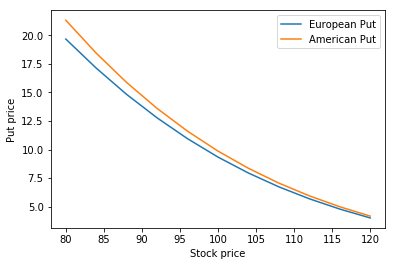

In [16]:
def BinomPutCRR(r, sigma, s0, K, T, Euro = True, n = 200):
    delta = T/n
    disc = math.exp(- r * delta)
    
    u = math.exp(sigma * math.sqrt(delta))
    d = math.exp(-sigma * math.sqrt(delta))
    p = 1/2. + 1/2. * (r - 0.5 * sigma**2) * math.sqrt(delta)/sigma
    
    
    # create matrix to store stock prices ans option prices at all nodes
    stockprice = np.zeros((n+1, n+1))
    optprice = np.zeros((n+1, n+1))
    stockprice[0,0] = s0 # initialize stock price
    
    for i in range(1, n+1):
        stockprice[i, 0] = stockprice[i-1, 0] * u
        for j in range(1, i+1):
            stockprice[i, j] = stockprice[i-1, j-1] * d
    
    # compute the call payoffs from the ending node
    for w in range(n+1):
        optprice[n, w] = max(K - stockprice[n, w],0)
     
    # backward
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            optprice[i, j] = disc * (p * optprice[i+1, j] + (1-p) * optprice[i+1, j+1])
            if Euro == False:
                optprice[i, j] = max(optprice[i,j], K- stockprice[i,j])
            
    return optprice[0,0]


Eput = [BinomPutCRR(r = 0.05, sigma = 0.3, s0 = x, K = 100, T = 1, Euro = True, n = 200) for x in range(80,124,4)]
Aput = [BinomPutCRR(r = 0.05, sigma = 0.3, s0 = x, K = 100, T = 1, Euro = False, n = 200) for x in range(80,124,4)]

plt.plot(range(80,124,4), Eput, label = "European Put")
plt.plot(range(80,124,4), Aput, label = "American Put")
plt.xlabel("Stock price")
plt.ylabel("Put price")
plt.legend()
plt.show()
plt.clf()

As is shown in the graph above, the American put has higher price than European put. As the inital stock price increases, both put options go Out-of-the money. Both prices goes down and differences get smaller.

Problem 5

a.

In [2]:
def TrinomialA(r, sigma, s0, K, T, N):
    delta = T/N
    d = np.exp(-sigma * np.sqrt(3 * delta))
    u = 1/d
    pd = (r * delta *(1-u) + pow(r*delta, 2) + delta * sigma**2)/(u - d)/(1 - d)
    pu = (r * delta *(1-d) + pow(r*delta, 2) + delta * sigma**2)/(u - d)/(u - 1)
    pm = 1 - pu - pd
    disc = np.exp(-r*delta)
    
    # create matrix to store all stock prices
    stockprice = np.zeros((2*N+1,N+1))
    stockprice[N,0] = s0
    
    for i in range(1, N+1):
        stockprice[range((N-i),(N+1+i)), i] = s0*(u**np.arange(i,-i-1,-1))
    
    payoff = np.zeros_like(stockprice)
    payoff[:,-1] = np.maximum(stockprice[:,-1]- K, 0)
    
    for i in range(N,0,-1):
        payoff[range((N-i+1),(N+i)), i-1] = disc * (pu * payoff[(N-i+2):(i+N+1), i] +
                          pm * payoff[(N-i+1):(i+N), i] + pd * payoff[(N-i):(i+N-1), i])
    
    callprice = payoff[N,0]
    return callprice
 
s0_5 = [10,15,20,40,70,80,100,200,500]
Tri_a = [TrinomialA(r = 0.05, sigma = 0.24, s0 = 32, K = 30, T = 0.5, N = x) for x in s0_5]

b.

In [3]:
# (b)
def TrinomialB(r, sigma, s0, K, T, N):
    delta = T/N
    xu = sigma * np.sqrt(3*delta)
    xd = -sigma * np.sqrt(3*delta)
    pd = 1/2. * ((delta * sigma**2 + pow(r - 0.5 *sigma**2, 2) * delta**2)/xu**2 -
                 (r - 0.5 * sigma **2) * delta/xu)
    pu = 1/2. * ((delta * sigma**2 + pow(r - 0.5 *sigma**2, 2) * delta**2)/xu**2 +
                 (r - 0.5 * sigma **2) * delta/xu)
    pm = 1 - pu - pd
    disc = np.exp(-r*delta)
    
    # create matrix to store all stock prices

    stockprice = np.zeros((2*N+1,N+1))
    stockprice[N,0] = s0
    
    for i in range(1, N+1):
        stockprice[range((N-i),(N+1+i)),i] = s0*(np.exp(np.arange(i,-i-1, -1) * xu))
    
    payoff = np.zeros_like(stockprice)
    payoff[:,-1] = np.maximum(stockprice[:,-1]- K, 0)
    
    for i in range(N,0,-1):
        payoff[range((N-i+1),(N+i)), i-1] = disc * (pu * payoff[(N-i+2):(i+N+1), i] +
                          pm * payoff[(N-i+1):(i+N), i] + pd * payoff[(N-i):(i+N-1), i])
    
    callprice = payoff[N,0]
    return callprice

Tri_b = [TrinomialB(r = 0.05, sigma = 0.24, s0 = 32, K = 30, T = 0.5, N = x) for x in s0_5]

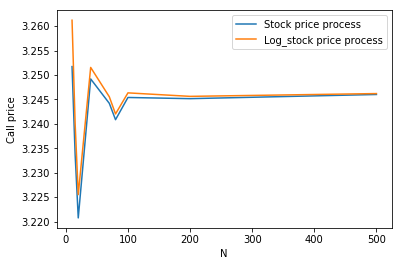

In [4]:
plt.plot(s0_5, Tri_a, label = "Stock price process")
plt.plot(s0_5, Tri_b, label = "Log_stock price process")
plt.xlabel("N")
plt.ylabel("Call price")
plt.legend()
plt.show()

Problem 6

In [29]:
def Halton(size, base):
    seq = []
    for i in range(size):
        k, denom = 0., 1.
        while i>0:
            i, remainder = divmod(i, base)
            denom *= base
            k += remainder / denom
        seq.append(k)

    return np.array(seq)


def Ecall_MC(S_0, K, T, r, sigma, N, b1, b2):
    
    # generate halton sequences with base1 and base2
    # since the first number of Halton sequences is 0, we generate N+1 numbers and take the last N ones
    h1 = Halton(N+1, b1)[1:]
    h2 = Halton(N+1, b2)[1:]
    # generate a series of zi~N(0,1) using Box-Muller Method
    z1 = np.sqrt(-2*np.log(h1)) * np.cos(2*np.pi*h2)
    z2 = np.sqrt(-2*np.log(h1)) * np.sin(2*np.pi*h2)
    z = np.append(z1, z2)
    
    cprices = list(map(lambda i: np.exp(- r * T) *
                    max((S_0 * np.exp((r - sigma**2/2) * T + sigma * np.sqrt(T) *i) - K), 0), z))
    
    return np.mean(cprices)
# use the given S_0, K, T, r, sigma in Problem 1, take base = [2,5] and N =10,000 
C = Ecall_MC(S_0 = 32, K = 30, T = 0.5, r = 0.05, sigma = 0.24, N = 10000, b1 = 2, b2 = 5)
print("C: " + str(C))

C: 3.72289113584


Take $S_0 = 32, K =30, T= 0.5, r = 0.05, \sigma = 0.24, N = 10000, b_1 = 2, b_2= 5$ (the parameters used in Problem 1), the price is 3.7229.